In [1]:
# I am using a mock dataset

In [2]:
import numpy as np
import pandas as pd
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


In [3]:
Wearable = pd.read_excel('Data_Folder/Demo4_20/4_20_wearable_inside.xlsx',header=0,index_col=0)
Stationary = pd.read_excel('Data_Folder/Demo4_20/4_20_stationary.xlsx',header=0,index_col=False)
Weather = pd.read_csv('Data_Folder/Demo4_20/weather_4_20.txt',delimiter=',',header=None,index_col=False)
Weather.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [4]:
Stationary.drop([0,554],inplace=True)

from datetime import datetime
Stationary = Stationary.resample('1T',on='Time').mean()

Wearable.index = range(Wearable.shape[0])
Wearable = Wearable.iloc[:556,:]

from datetime import datetime
for i in range(Weather.shape[0]):
    Weather.set_value(i, 'New_Time', datetime.strptime(Weather.iloc[i,0], '%Y-%m-%d %H:%M:%S'), takeable=False)
Weather = Weather.resample('1T', on='New_Time').mean()
Weather = Weather.iloc[632:1188]

Wearable.index = range(Wearable.shape[0])
Wearable.drop(columns=['Time(s)'],inplace=True)
Wearable.drop(Wearable.columns[0],axis=1,inplace=True)
Stationary.index = range(Stationary.shape[0])
Weather.index = range(Weather.shape[0])
#Stationary = Wea_Stat_Wearable.fillna(method='ffill')
Stationary = Stationary.fillna(method='ffill')
Wearable = Wearable.fillna(method='ffill')
#Wea_Stat = pd.concat([Weather, Stationary],axis=1)
#Wea_Stat


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [5]:
#Wea_Stat

In [6]:
Wea_Stat = pd.concat([Weather,Stationary],axis=1)

### Weather Model 

### decay learning
https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/
<br>may wanna consider comparing adam, sgd, SGD+momentum, SGD+Nest.+momentum

In [25]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(Wea_Stat, Wearable, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_weather = X_train[:,:11]
X_train_stationary = X_train[:,11:]
X_test_weather = X_test[:,:11]
X_test_stationary = X_test[:,11:]
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 6))

#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)
# Compiling the ANN
#sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
adagrad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
model.compile(optimizer = adagrad, loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model.fit(X_train_weather, y_train, batch_size = 10, epochs = 2000)

Epoch 1/2000
444/444 [==============================] - 0s 734us/step - loss: 3729983.3125
Epoch 2/2000
444/444 [==============================] - 0s 237us/step - loss: 3099888.3984
Epoch 3/2000
444/444 [==============================] - 0s 205us/step - loss: 2010897.2341
Epoch 4/2000
444/444 [==============================] - 0s 189us/step - loss: 1166353.7936
Epoch 5/2000
444/444 [==============================] - 0s 211us/step - loss: 751076.6092
Epoch 6/2000
444/444 [==============================] - 0s 161us/step - loss: 569217.6579
Epoch 7/2000
444/444 [==============================] - 0s 175us/step - loss: 483320.8563
Epoch 8/2000
444/444 [==============================] - 0s 188us/step - loss: 434375.0768
Epoch 9/2000
444/444 [==============================] - 0s 158us/step - loss: 403938.7231
Epoch 10/2000
444/444 [==============================] - 0s 151us/step - loss: 381999.9562
Epoch 11/2000
444/444 [==============================] - 0s 141us/step - loss: 366362.2759
Epoc

444/444 [==============================] - 0s 162us/step - loss: 261783.5294
Epoch 91/2000
444/444 [==============================] - 0s 174us/step - loss: 261489.5839
Epoch 92/2000
444/444 [==============================] - 0s 165us/step - loss: 261516.4149
Epoch 93/2000
444/444 [==============================] - 0s 147us/step - loss: 261479.8869
Epoch 94/2000
444/444 [==============================] - 0s 149us/step - loss: 261185.1175
Epoch 95/2000
444/444 [==============================] - 0s 150us/step - loss: 260989.3061
Epoch 96/2000
444/444 [==============================] - 0s 152us/step - loss: 260802.4884
Epoch 97/2000
444/444 [==============================] - 0s 149us/step - loss: 260649.9916
Epoch 98/2000
444/444 [==============================] - 0s 152us/step - loss: 260511.1325
Epoch 99/2000
444/444 [==============================] - 0s 154us/step - loss: 260321.3429
Epoch 100/2000
444/444 [==============================] - 0s 155us/step - loss: 260074.8922
Epoch 101/20

444/444 [==============================] - 0s 161us/step - loss: 252093.8182
Epoch 180/2000
444/444 [==============================] - 0s 151us/step - loss: 251945.7595
Epoch 181/2000
444/444 [==============================] - 0s 150us/step - loss: 251815.3331
Epoch 182/2000
444/444 [==============================] - 0s 146us/step - loss: 251834.6326
Epoch 183/2000
444/444 [==============================] - 0s 146us/step - loss: 251716.5948
Epoch 184/2000
444/444 [==============================] - ETA: 0s - loss: 260889.60 - 0s 143us/step - loss: 251745.8680
Epoch 185/2000
444/444 [==============================] - 0s 143us/step - loss: 251648.0149
Epoch 186/2000
444/444 [==============================] - 0s 155us/step - loss: 251547.9006
Epoch 187/2000
444/444 [==============================] - 0s 149us/step - loss: 251454.8533
Epoch 188/2000
444/444 [==============================] - 0s 150us/step - loss: 251420.1737
Epoch 189/2000
444/444 [==============================] - 0s 148us/

444/444 [==============================] - 0s 150us/step - loss: 247367.8767
Epoch 268/2000
444/444 [==============================] - 0s 164us/step - loss: 247328.0943
Epoch 269/2000
444/444 [==============================] - 0s 145us/step - loss: 247161.8352
Epoch 270/2000
444/444 [==============================] - 0s 139us/step - loss: 247170.7363
Epoch 271/2000
444/444 [==============================] - 0s 141us/step - loss: 247165.6900
Epoch 272/2000
444/444 [==============================] - 0s 153us/step - loss: 247171.4530
Epoch 273/2000
444/444 [==============================] - 0s 146us/step - loss: 247118.5238
Epoch 274/2000
444/444 [==============================] - 0s 142us/step - loss: 247000.1517
Epoch 275/2000
444/444 [==============================] - 0s 136us/step - loss: 247135.0017
Epoch 276/2000
444/444 [==============================] - 0s 184us/step - loss: 247171.6738
Epoch 277/2000
444/444 [==============================] - 0s 152us/step - loss: 246855.6033
Epo

444/444 [==============================] - 0s 154us/step - loss: 244234.9011
Epoch 357/2000
444/444 [==============================] - 0s 168us/step - loss: 244272.0466
Epoch 358/2000
444/444 [==============================] - 0s 154us/step - loss: 244160.1823
Epoch 359/2000
444/444 [==============================] - 0s 146us/step - loss: 244113.6577
Epoch 360/2000
444/444 [==============================] - 0s 152us/step - loss: 244104.2717
Epoch 361/2000
444/444 [==============================] - 0s 160us/step - loss: 244077.2768
Epoch 362/2000
444/444 [==============================] - 0s 178us/step - loss: 244106.6060
Epoch 363/2000
444/444 [==============================] - 0s 177us/step - loss: 244148.5519
Epoch 364/2000
444/444 [==============================] - 0s 184us/step - loss: 243971.6794
Epoch 365/2000
444/444 [==============================] - 0s 162us/step - loss: 243967.8824
Epoch 366/2000
444/444 [==============================] - 0s 151us/step - loss: 244010.1174
Epo

444/444 [==============================] - 0s 188us/step - loss: 241924.3634
Epoch 445/2000
444/444 [==============================] - 0s 210us/step - loss: 241788.7945
Epoch 446/2000
444/444 [==============================] - 0s 197us/step - loss: 241860.2821
Epoch 447/2000
444/444 [==============================] - 0s 169us/step - loss: 241785.5256
Epoch 448/2000
444/444 [==============================] - 0s 186us/step - loss: 241768.0152
Epoch 449/2000
444/444 [==============================] - 0s 179us/step - loss: 241742.0157
Epoch 450/2000
444/444 [==============================] - 0s 177us/step - loss: 241698.2985
Epoch 451/2000
444/444 [==============================] - 0s 151us/step - loss: 241747.8766
Epoch 452/2000
444/444 [==============================] - 0s 160us/step - loss: 241680.0400
Epoch 453/2000
444/444 [==============================] - 0s 167us/step - loss: 241646.8248
Epoch 454/2000
444/444 [==============================] - 0s 214us/step - loss: 241524.8555
Epo

444/444 [==============================] - 0s 164us/step - loss: 239878.6538
Epoch 534/2000
444/444 [==============================] - 0s 174us/step - loss: 239850.0505
Epoch 535/2000
444/444 [==============================] - 0s 175us/step - loss: 239847.9808
Epoch 536/2000
444/444 [==============================] - 0s 153us/step - loss: 239855.4603
Epoch 537/2000
444/444 [==============================] - 0s 145us/step - loss: 239785.8820
Epoch 538/2000
444/444 [==============================] - 0s 149us/step - loss: 239745.1287
Epoch 539/2000
444/444 [==============================] - 0s 149us/step - loss: 239732.2858
Epoch 540/2000
444/444 [==============================] - 0s 183us/step - loss: 239720.0161
Epoch 541/2000
444/444 [==============================] - 0s 244us/step - loss: 239619.4892
Epoch 542/2000
444/444 [==============================] - 0s 207us/step - loss: 239655.1214
Epoch 543/2000
444/444 [==============================] - 0s 272us/step - loss: 239640.5029
Epo

444/444 [==============================] - 0s 159us/step - loss: 238121.7334
Epoch 622/2000
444/444 [==============================] - 0s 166us/step - loss: 238083.2112
Epoch 623/2000
444/444 [==============================] - 0s 156us/step - loss: 238062.6366
Epoch 624/2000
444/444 [==============================] - 0s 161us/step - loss: 238050.0247
Epoch 625/2000
444/444 [==============================] - 0s 154us/step - loss: 237992.1923
Epoch 626/2000
444/444 [==============================] - 0s 159us/step - loss: 238031.6331
Epoch 627/2000
444/444 [==============================] - 0s 160us/step - loss: 238015.2927
Epoch 628/2000
444/444 [==============================] - 0s 155us/step - loss: 237961.54680s - loss: 247039.78
Epoch 629/2000
444/444 [==============================] - 0s 158us/step - loss: 237948.8995
Epoch 630/2000
444/444 [==============================] - 0s 165us/step - loss: 237987.4639
Epoch 631/2000
444/444 [==============================] - 0s 162us/step - l

Epoch 710/2000
444/444 [==============================] - 0s 155us/step - loss: 236561.8327
Epoch 711/2000
444/444 [==============================] - 0s 156us/step - loss: 236562.7834
Epoch 712/2000
444/444 [==============================] - 0s 156us/step - loss: 236485.9438
Epoch 713/2000
444/444 [==============================] - 0s 151us/step - loss: 236453.4341
Epoch 714/2000
444/444 [==============================] - 0s 163us/step - loss: 236454.1451
Epoch 715/2000
444/444 [==============================] - 0s 162us/step - loss: 236511.4684
Epoch 716/2000
444/444 [==============================] - 0s 153us/step - loss: 236463.5515
Epoch 717/2000
444/444 [==============================] - 0s 155us/step - loss: 236397.1029
Epoch 718/2000
444/444 [==============================] - 0s 156us/step - loss: 236419.1660
Epoch 719/2000
444/444 [==============================] - 0s 157us/step - loss: 236427.1198
Epoch 720/2000
444/444 [==============================] - 0s 152us/step - loss: 

444/444 [==============================] - 0s 156us/step - loss: 234990.2985
Epoch 799/2000
444/444 [==============================] - 0s 154us/step - loss: 234913.7977
Epoch 800/2000
444/444 [==============================] - 0s 154us/step - loss: 234934.0540
Epoch 801/2000
444/444 [==============================] - 0s 153us/step - loss: 234947.0216
Epoch 802/2000
444/444 [==============================] - 0s 175us/step - loss: 234871.3260
Epoch 803/2000
444/444 [==============================] - 0s 154us/step - loss: 234888.7460
Epoch 804/2000
444/444 [==============================] - 0s 182us/step - loss: 234862.8008
Epoch 805/2000
444/444 [==============================] - 0s 187us/step - loss: 234821.5810
Epoch 806/2000
444/444 [==============================] - 0s 185us/step - loss: 234815.8825
Epoch 807/2000
444/444 [==============================] - 0s 191us/step - loss: 234859.2538
Epoch 808/2000
444/444 [==============================] - 0s 181us/step - loss: 234804.9707
Epo

444/444 [==============================] - 0s 159us/step - loss: 233477.6705
Epoch 887/2000
444/444 [==============================] - 0s 156us/step - loss: 233484.8630
Epoch 888/2000
444/444 [==============================] - 0s 155us/step - loss: 233398.2566
Epoch 889/2000
444/444 [==============================] - 0s 159us/step - loss: 233420.4731
Epoch 890/2000
444/444 [==============================] - 0s 149us/step - loss: 233331.0226
Epoch 891/2000
444/444 [==============================] - 0s 146us/step - loss: 233326.7067
Epoch 892/2000
444/444 [==============================] - 0s 157us/step - loss: 233328.5416
Epoch 893/2000
444/444 [==============================] - 0s 166us/step - loss: 233370.8406
Epoch 894/2000
444/444 [==============================] - 0s 152us/step - loss: 233290.7191
Epoch 895/2000
444/444 [==============================] - 0s 153us/step - loss: 233295.9134
Epoch 896/2000
444/444 [==============================] - 0s 165us/step - loss: 233233.3521
Epo

Epoch 975/2000
444/444 [==============================] - 0s 159us/step - loss: 231447.7892
Epoch 976/2000
444/444 [==============================] - 0s 150us/step - loss: 231471.1585
Epoch 977/2000
444/444 [==============================] - 0s 156us/step - loss: 231411.0858
Epoch 978/2000
444/444 [==============================] - 0s 158us/step - loss: 231334.1320
Epoch 979/2000
444/444 [==============================] - 0s 163us/step - loss: 231343.1098
Epoch 980/2000
444/444 [==============================] - 0s 150us/step - loss: 231267.8069
Epoch 981/2000
444/444 [==============================] - 0s 163us/step - loss: 231300.6495
Epoch 982/2000
444/444 [==============================] - 0s 157us/step - loss: 231229.0546
Epoch 983/2000
444/444 [==============================] - 0s 148us/step - loss: 231248.4188
Epoch 984/2000
444/444 [==============================] - 0s 168us/step - loss: 231186.9475
Epoch 985/2000
444/444 [==============================] - 0s 156us/step - loss: 

444/444 [==============================] - 0s 156us/step - loss: 229199.0800
Epoch 1064/2000
444/444 [==============================] - 0s 157us/step - loss: 229207.7241
Epoch 1065/2000
444/444 [==============================] - 0s 164us/step - loss: 229120.4149
Epoch 1066/2000
444/444 [==============================] - 0s 165us/step - loss: 229165.6212
Epoch 1067/2000
444/444 [==============================] - 0s 149us/step - loss: 229143.6816
Epoch 1068/2000
444/444 [==============================] - 0s 173us/step - loss: 229081.0491
Epoch 1069/2000
444/444 [==============================] - 0s 150us/step - loss: 229035.7332
Epoch 1070/2000
444/444 [==============================] - 0s 207us/step - loss: 229119.0530
Epoch 1071/2000
444/444 [==============================] - 0s 157us/step - loss: 229028.7241
Epoch 1072/2000
444/444 [==============================] - 0s 157us/step - loss: 229061.3877
Epoch 1073/2000
444/444 [==============================] - 0s 173us/step - loss: 22902

444/444 [==============================] - 0s 151us/step - loss: 227329.6206
Epoch 1152/2000
444/444 [==============================] - 0s 165us/step - loss: 227328.0167
Epoch 1153/2000
444/444 [==============================] - 0s 159us/step - loss: 227356.3680
Epoch 1154/2000
444/444 [==============================] - 0s 180us/step - loss: 227309.4884
Epoch 1155/2000
444/444 [==============================] - 0s 193us/step - loss: 227296.2944
Epoch 1156/2000
444/444 [==============================] - 0s 157us/step - loss: 227268.1547
Epoch 1157/2000
444/444 [==============================] - 0s 161us/step - loss: 227248.5577
Epoch 1158/2000
444/444 [==============================] - 0s 156us/step - loss: 227198.2655
Epoch 1159/2000
444/444 [==============================] - 0s 154us/step - loss: 227198.1761
Epoch 1160/2000
444/444 [==============================] - 0s 164us/step - loss: 227104.1741
Epoch 1161/2000
444/444 [==============================] - 0s 169us/step - loss: 22711

444/444 [==============================] - 0s 147us/step - loss: 225628.7491
Epoch 1239/2000
444/444 [==============================] - 0s 156us/step - loss: 225566.3992
Epoch 1240/2000
444/444 [==============================] - 0s 166us/step - loss: 225564.4409
Epoch 1241/2000
444/444 [==============================] - 0s 153us/step - loss: 225550.1540
Epoch 1242/2000
444/444 [==============================] - 0s 146us/step - loss: 225549.4210
Epoch 1243/2000
444/444 [==============================] - 0s 153us/step - loss: 225521.6309
Epoch 1244/2000
444/444 [==============================] - 0s 153us/step - loss: 225533.1951
Epoch 1245/2000
444/444 [==============================] - 0s 146us/step - loss: 225485.6462
Epoch 1246/2000
444/444 [==============================] - 0s 147us/step - loss: 225467.8963
Epoch 1247/2000
444/444 [==============================] - 0s 154us/step - loss: 225479.8355
Epoch 1248/2000
444/444 [==============================] - 0s 162us/step - loss: 22542

444/444 [==============================] - 0s 156us/step - loss: 224004.3509
Epoch 1326/2000
444/444 [==============================] - 0s 162us/step - loss: 224015.0883
Epoch 1327/2000
444/444 [==============================] - 0s 186us/step - loss: 224059.0852
Epoch 1328/2000
444/444 [==============================] - 0s 165us/step - loss: 224023.9709
Epoch 1329/2000
444/444 [==============================] - 0s 156us/step - loss: 223980.4196
Epoch 1330/2000
444/444 [==============================] - 0s 156us/step - loss: 223980.1842
Epoch 1331/2000
444/444 [==============================] - 0s 157us/step - loss: 223922.9041
Epoch 1332/2000
444/444 [==============================] - 0s 160us/step - loss: 223989.8504
Epoch 1333/2000
444/444 [==============================] - 0s 156us/step - loss: 223875.1527
Epoch 1334/2000
444/444 [==============================] - 0s 155us/step - loss: 223854.2134
Epoch 1335/2000
444/444 [==============================] - 0s 161us/step - loss: 22387

444/444 [==============================] - 0s 156us/step - loss: 222532.4740
Epoch 1414/2000
444/444 [==============================] - 0s 157us/step - loss: 222552.8695
Epoch 1415/2000
444/444 [==============================] - 0s 156us/step - loss: 222552.5892
Epoch 1416/2000
444/444 [==============================] - 0s 230us/step - loss: 222524.8222
Epoch 1417/2000
444/444 [==============================] - 0s 252us/step - loss: 222496.5054
Epoch 1418/2000
444/444 [==============================] - 0s 201us/step - loss: 222500.6719
Epoch 1419/2000
444/444 [==============================] - 0s 165us/step - loss: 222433.7797
Epoch 1420/2000
444/444 [==============================] - 0s 165us/step - loss: 222412.6472
Epoch 1421/2000
444/444 [==============================] - 0s 155us/step - loss: 222438.1413
Epoch 1422/2000
444/444 [==============================] - 0s 149us/step - loss: 222415.1941
Epoch 1423/2000
444/444 [==============================] - 0s 242us/step - loss: 22240

444/444 [==============================] - 0s 192us/step - loss: 221156.2383
Epoch 1501/2000
444/444 [==============================] - 0s 215us/step - loss: 221216.8528
Epoch 1502/2000
444/444 [==============================] - 0s 262us/step - loss: 221200.1300
Epoch 1503/2000
444/444 [==============================] - 0s 239us/step - loss: 221144.4063
Epoch 1504/2000
444/444 [==============================] - 0s 242us/step - loss: 221120.8818
Epoch 1505/2000
444/444 [==============================] - 0s 236us/step - loss: 221073.2484
Epoch 1506/2000
444/444 [==============================] - 0s 271us/step - loss: 221089.5674
Epoch 1507/2000
444/444 [==============================] - 0s 186us/step - loss: 221078.5268
Epoch 1508/2000
444/444 [==============================] - 0s 260us/step - loss: 221070.5607
Epoch 1509/2000
444/444 [==============================] - 0s 232us/step - loss: 221079.3569
Epoch 1510/2000
444/444 [==============================] - 0s 223us/step - loss: 22104

444/444 [==============================] - 0s 190us/step - loss: 219965.9701
Epoch 1588/2000
444/444 [==============================] - 0s 175us/step - loss: 219968.6231
Epoch 1589/2000
444/444 [==============================] - 0s 148us/step - loss: 219934.5505
Epoch 1590/2000
444/444 [==============================] - 0s 140us/step - loss: 219921.5938
Epoch 1591/2000
444/444 [==============================] - 0s 161us/step - loss: 219900.2223
Epoch 1592/2000
444/444 [==============================] - 0s 145us/step - loss: 219944.6735
Epoch 1593/2000
444/444 [==============================] - 0s 153us/step - loss: 219862.8767
Epoch 1594/2000
444/444 [==============================] - 0s 149us/step - loss: 219891.1490
Epoch 1595/2000
444/444 [==============================] - 0s 159us/step - loss: 219878.5182
Epoch 1596/2000
444/444 [==============================] - 0s 158us/step - loss: 219856.0257
Epoch 1597/2000
444/444 [==============================] - 0s 155us/step - loss: 21981

444/444 [==============================] - 0s 153us/step - loss: 218784.3030
Epoch 1676/2000
444/444 [==============================] - 0s 158us/step - loss: 218747.3621
Epoch 1677/2000
444/444 [==============================] - 0s 163us/step - loss: 218755.9577
Epoch 1678/2000
444/444 [==============================] - 0s 147us/step - loss: 218745.9895
Epoch 1679/2000
444/444 [==============================] - 0s 150us/step - loss: 218703.8065
Epoch 1680/2000
444/444 [==============================] - 0s 147us/step - loss: 218710.4097
Epoch 1681/2000
444/444 [==============================] - 0s 149us/step - loss: 218688.8368
Epoch 1682/2000
444/444 [==============================] - 0s 146us/step - loss: 218682.1340
Epoch 1683/2000
444/444 [==============================] - 0s 146us/step - loss: 218671.3262
Epoch 1684/2000
444/444 [==============================] - 0s 139us/step - loss: 218657.2351
Epoch 1685/2000
444/444 [==============================] - 0s 165us/step - loss: 21863

444/444 [==============================] - 0s 158us/step - loss: 217691.4054
Epoch 1763/2000
444/444 [==============================] - 0s 152us/step - loss: 217686.5826
Epoch 1764/2000
444/444 [==============================] - 0s 155us/step - loss: 217691.0886
Epoch 1765/2000
444/444 [==============================] - 0s 157us/step - loss: 217660.4142
Epoch 1766/2000
444/444 [==============================] - 0s 152us/step - loss: 217654.8656
Epoch 1767/2000
444/444 [==============================] - 0s 149us/step - loss: 217675.6159
Epoch 1768/2000
444/444 [==============================] - 0s 150us/step - loss: 217647.4479
Epoch 1769/2000
444/444 [==============================] - 0s 158us/step - loss: 217632.0783
Epoch 1770/2000
444/444 [==============================] - 0s 146us/step - loss: 217669.1291
Epoch 1771/2000
444/444 [==============================] - 0s 151us/step - loss: 217593.8734
Epoch 1772/2000
444/444 [==============================] - 0s 166us/step - loss: 21758

444/444 [==============================] - 0s 154us/step - loss: 216649.5215
Epoch 1851/2000
444/444 [==============================] - 0s 167us/step - loss: 216642.6348
Epoch 1852/2000
444/444 [==============================] - 0s 155us/step - loss: 216674.4532
Epoch 1853/2000
444/444 [==============================] - 0s 152us/step - loss: 216675.9642
Epoch 1854/2000
444/444 [==============================] - 0s 164us/step - loss: 216649.9235
Epoch 1855/2000
444/444 [==============================] - 0s 159us/step - loss: 216631.1603
Epoch 1856/2000
444/444 [==============================] - 0s 152us/step - loss: 216640.5709
Epoch 1857/2000
444/444 [==============================] - 0s 156us/step - loss: 216570.9217
Epoch 1858/2000
444/444 [==============================] - 0s 157us/step - loss: 216669.9851
Epoch 1859/2000
444/444 [==============================] - 0s 174us/step - loss: 216561.7666
Epoch 1860/2000
444/444 [==============================] - 0s 155us/step - loss: 21656

444/444 [==============================] - 0s 157us/step - loss: 215685.8931
Epoch 1938/2000
444/444 [==============================] - 0s 152us/step - loss: 215717.3288
Epoch 1939/2000
444/444 [==============================] - 0s 148us/step - loss: 215711.3648
Epoch 1940/2000
444/444 [==============================] - 0s 162us/step - loss: 215679.4529
Epoch 1941/2000
444/444 [==============================] - 0s 159us/step - loss: 215685.1555
Epoch 1942/2000
444/444 [==============================] - 0s 163us/step - loss: 215680.4423
Epoch 1943/2000
444/444 [==============================] - 0s 164us/step - loss: 215663.3359
Epoch 1944/2000
444/444 [==============================] - 0s 156us/step - loss: 215668.7093
Epoch 1945/2000
444/444 [==============================] - 0s 160us/step - loss: 215640.1469
Epoch 1946/2000
444/444 [==============================] - 0s 163us/step - loss: 215640.3442
Epoch 1947/2000
444/444 [==============================] - 0s 149us/step - loss: 21563

214873.63020596327


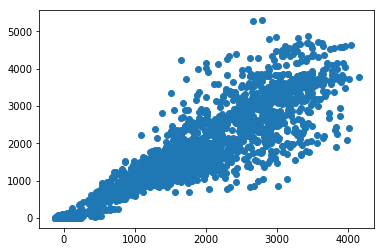

In [26]:
y_train_test_weather = model.predict(X_train_weather)
plt.scatter(y_train_test_weather,y_train)
mse = mean_squared_error(y_train_test_weather, y_train)
print mse

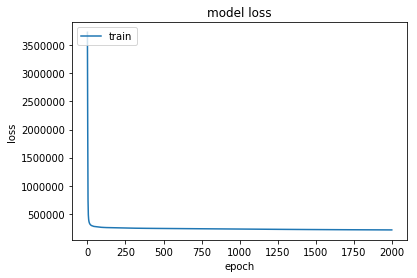

In [28]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Stationary Model 

In [29]:
"""
# Splitting the dataset into the Training set and Test set
#X_train, X_test, y_train, y_test = train_test_split(Stationary, Wearable, test_size = 0.2, random_state = 0)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model2 = Sequential()

# Adding the input layer and the first hidden layer
model2.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model2.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model2.add(Dense(units = 6))

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)
# Compiling the ANN
model2.compile(optimizer = adam , loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model2.fit(X_train_stationary, y_train, batch_size = 10, epochs = 2000)"""

"\n# Splitting the dataset into the Training set and Test set\n#X_train, X_test, y_train, y_test = train_test_split(Stationary, Wearable, test_size = 0.2, random_state = 0)\n#sc = StandardScaler()\n#X_train = sc.fit_transform(X_train)\n#X_test = sc.transform(X_test)\n\n# Initialising the ANN\nmodel2 = Sequential()\n\n# Adding the input layer and the first hidden layer\nmodel2.add(Dense(32, activation = 'relu', input_dim = 6))\n\n# Adding the second hidden layer\nmodel2.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the third hidden layer\nmodel2.add(Dense(units = 32, activation = 'relu'))\n\n# Adding the output layer\n\nmodel2.add(Dense(units = 6))\n\nadam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.001, amsgrad=False)\n# Compiling the ANN\nmodel2.compile(optimizer = adam , loss = 'mean_squared_error')\n\n# Fitting the ANN to the Training set\nhistory = model2.fit(X_train_stationary, y_train, batch_size = 10, epochs = 2000)"

In [30]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train_stationary, y_train)
y_train_test_stationary = ll.predict(X_train_stationary)


4057.447356175202


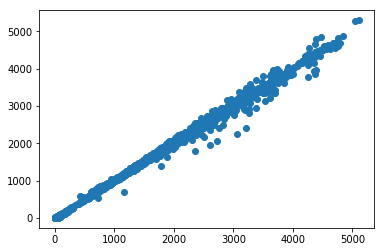

In [31]:
#y_train_test_stationary = model.predict(X_train_weather)
plt.scatter(y_train_test_stationary,y_train)
mse = mean_squared_error(y_train_test_stationary, y_train)
print mse

In [32]:
"""
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()"""

"\nplt.plot(history.history['loss'])\n#plt.plot(history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()"

### Weighted Function
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [33]:
y_train_weather = pd.DataFrame(y_train_test_weather)
y_train_stationary = pd.DataFrame(y_train_test_stationary)
X_train_pred = pd.concat([y_train_weather, y_train_stationary],axis=1)


In [34]:
#Pred = [y_pred_weather,y_pred_wearable]
#X_train, X_test, y_train, y_test = train_test_split(train_pred, y_test, test_size = 0.2, random_state = 0)
classifier = Sequential()
# Adding the Single Perceptron or Shallow network
classifier.add(Dense(50,activation='relu', input_dim=12))
# Adding dropout to prevent overfitting
#classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=6))
classifier.compile(optimizer = adagrad, loss = 'mean_squared_error')
#history = classifier.fit(X_train_pred, y_train, validation_data=(X_test,y_test),batch_size=10, nb_epoch=150)
history = classifier.fit(X_train_pred, y_train, batch_size=10, nb_epoch=2000)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6)`
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:12: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if sys.path[0] == '':


Epoch 1/2000
444/444 [==============================] - 0s 598us/step - loss: 168086.0613
Epoch 2/2000
444/444 [==============================] - 0s 192us/step - loss: 35605.9191
Epoch 3/2000
444/444 [==============================] - 0s 192us/step - loss: 22355.9736
Epoch 4/2000
444/444 [==============================] - 0s 137us/step - loss: 16364.6669
Epoch 5/2000
444/444 [==============================] - 0s 144us/step - loss: 14244.8205
Epoch 6/2000
444/444 [==============================] - 0s 181us/step - loss: 12709.1824
Epoch 7/2000
444/444 [==============================] - 0s 167us/step - loss: 13137.3806
Epoch 8/2000
444/444 [==============================] - 0s 162us/step - loss: 11676.0427
Epoch 9/2000
444/444 [==============================] - 0s 169us/step - loss: 11377.2371
Epoch 10/2000
444/444 [==============================] - 0s 194us/step - loss: 11196.7063
Epoch 11/2000
444/444 [==============================] - 0s 149us/step - loss: 10943.6392
Epoch 12/2000
444/

Epoch 93/2000
444/444 [==============================] - 0s 125us/step - loss: 5861.0378
Epoch 94/2000
444/444 [==============================] - 0s 152us/step - loss: 5761.1551
Epoch 95/2000
444/444 [==============================] - 0s 148us/step - loss: 5708.8224
Epoch 96/2000
444/444 [==============================] - 0s 158us/step - loss: 5771.1774
Epoch 97/2000
444/444 [==============================] - 0s 146us/step - loss: 5621.9590
Epoch 98/2000
444/444 [==============================] - 0s 153us/step - loss: 5719.7019
Epoch 99/2000
444/444 [==============================] - 0s 143us/step - loss: 5663.5239
Epoch 100/2000
444/444 [==============================] - 0s 149us/step - loss: 5666.8590
Epoch 101/2000
444/444 [==============================] - 0s 144us/step - loss: 5626.3199
Epoch 102/2000
444/444 [==============================] - 0s 142us/step - loss: 5546.2186
Epoch 103/2000
444/444 [==============================] - 0s 138us/step - loss: 5472.1333
Epoch 104/2000
44

444/444 [==============================] - 0s 114us/step - loss: 4797.7962
Epoch 185/2000
444/444 [==============================] - 0s 133us/step - loss: 4810.2988
Epoch 186/2000
444/444 [==============================] - 0s 117us/step - loss: 4849.2060
Epoch 187/2000
444/444 [==============================] - 0s 124us/step - loss: 4874.5882
Epoch 188/2000
444/444 [==============================] - 0s 133us/step - loss: 4812.5862
Epoch 189/2000
444/444 [==============================] - 0s 163us/step - loss: 4835.4087
Epoch 190/2000
444/444 [==============================] - 0s 139us/step - loss: 4832.2974
Epoch 191/2000
444/444 [==============================] - 0s 135us/step - loss: 4850.8922
Epoch 192/2000
444/444 [==============================] - 0s 118us/step - loss: 4834.4402
Epoch 193/2000
444/444 [==============================] - 0s 143us/step - loss: 4824.8765
Epoch 194/2000
444/444 [==============================] - 0s 136us/step - loss: 4884.3980
Epoch 195/2000
444/444 [=

444/444 [==============================] - 0s 133us/step - loss: 4512.2899
Epoch 276/2000
444/444 [==============================] - 0s 138us/step - loss: 4500.9367
Epoch 277/2000
444/444 [==============================] - 0s 136us/step - loss: 4525.5498
Epoch 278/2000
444/444 [==============================] - 0s 108us/step - loss: 4494.8341
Epoch 279/2000
444/444 [==============================] - 0s 106us/step - loss: 4531.9750
Epoch 280/2000
444/444 [==============================] - 0s 114us/step - loss: 4476.3813
Epoch 281/2000
444/444 [==============================] - 0s 129us/step - loss: 4502.2409
Epoch 282/2000
444/444 [==============================] - 0s 115us/step - loss: 4479.4994
Epoch 283/2000
444/444 [==============================] - 0s 116us/step - loss: 4555.0617
Epoch 284/2000
444/444 [==============================] - 0s 127us/step - loss: 4463.4224
Epoch 285/2000
444/444 [==============================] - 0s 132us/step - loss: 4519.4202
Epoch 286/2000
444/444 [=

444/444 [==============================] - 0s 152us/step - loss: 4301.3372
Epoch 367/2000
444/444 [==============================] - 0s 143us/step - loss: 4313.1692
Epoch 368/2000
444/444 [==============================] - 0s 133us/step - loss: 4362.3645
Epoch 369/2000
444/444 [==============================] - 0s 151us/step - loss: 4351.8157
Epoch 370/2000
444/444 [==============================] - 0s 111us/step - loss: 4397.5123
Epoch 371/2000
444/444 [==============================] - 0s 113us/step - loss: 4217.1746
Epoch 372/2000
444/444 [==============================] - 0s 111us/step - loss: 4291.0562
Epoch 373/2000
444/444 [==============================] - 0s 123us/step - loss: 4288.1457
Epoch 374/2000
444/444 [==============================] - 0s 112us/step - loss: 4328.1880
Epoch 375/2000
444/444 [==============================] - 0s 116us/step - loss: 4262.5725
Epoch 376/2000
444/444 [==============================] - 0s 132us/step - loss: 4272.1409
Epoch 377/2000
444/444 [=

444/444 [==============================] - 0s 113us/step - loss: 4338.5290
Epoch 458/2000
444/444 [==============================] - 0s 127us/step - loss: 4211.3641
Epoch 459/2000
444/444 [==============================] - 0s 141us/step - loss: 4184.8713
Epoch 460/2000
444/444 [==============================] - 0s 138us/step - loss: 4244.2921
Epoch 461/2000
444/444 [==============================] - 0s 117us/step - loss: 4133.2188
Epoch 462/2000
444/444 [==============================] - 0s 130us/step - loss: 4227.3213
Epoch 463/2000
444/444 [==============================] - 0s 118us/step - loss: 4192.1847
Epoch 464/2000
444/444 [==============================] - 0s 130us/step - loss: 4173.0685
Epoch 465/2000
444/444 [==============================] - 0s 117us/step - loss: 4158.8117
Epoch 466/2000
444/444 [==============================] - 0s 119us/step - loss: 4152.8686
Epoch 467/2000
444/444 [==============================] - 0s 126us/step - loss: 4207.6749
Epoch 468/2000
444/444 [=

Epoch 548/2000
444/444 [==============================] - 0s 115us/step - loss: 4121.2532
Epoch 549/2000
444/444 [==============================] - 0s 115us/step - loss: 4133.0983
Epoch 550/2000
444/444 [==============================] - 0s 108us/step - loss: 4118.4806
Epoch 551/2000
444/444 [==============================] - 0s 107us/step - loss: 4132.8632
Epoch 552/2000
444/444 [==============================] - 0s 108us/step - loss: 4116.5688
Epoch 553/2000
444/444 [==============================] - 0s 108us/step - loss: 4108.8239
Epoch 554/2000
444/444 [==============================] - 0s 110us/step - loss: 4089.5595
Epoch 555/2000
444/444 [==============================] - 0s 128us/step - loss: 4060.0419
Epoch 556/2000
444/444 [==============================] - 0s 146us/step - loss: 4161.0994
Epoch 557/2000
444/444 [==============================] - 0s 142us/step - loss: 4101.9681
Epoch 558/2000
444/444 [==============================] - 0s 144us/step - loss: 4117.1415
Epoch 559/

444/444 [==============================] - 0s 108us/step - loss: 4026.5653
Epoch 640/2000
444/444 [==============================] - ETA: 0s - loss: 2711.36 - 0s 117us/step - loss: 4092.3396
Epoch 641/2000
444/444 [==============================] - 0s 112us/step - loss: 4082.6872
Epoch 642/2000
444/444 [==============================] - 0s 117us/step - loss: 4109.6324
Epoch 643/2000
444/444 [==============================] - 0s 105us/step - loss: 4029.6366
Epoch 644/2000
444/444 [==============================] - 0s 106us/step - loss: 4072.0037
Epoch 645/2000
444/444 [==============================] - 0s 106us/step - loss: 4045.7856
Epoch 646/2000
444/444 [==============================] - 0s 108us/step - loss: 4080.4825
Epoch 647/2000
444/444 [==============================] - 0s 114us/step - loss: 4096.5962
Epoch 648/2000
444/444 [==============================] - 0s 107us/step - loss: 4035.0472
Epoch 649/2000
444/444 [==============================] - 0s 110us/step - loss: 4113.9541

444/444 [==============================] - 0s 114us/step - loss: 4045.4801
Epoch 730/2000
444/444 [==============================] - 0s 113us/step - loss: 4015.7429
Epoch 731/2000
444/444 [==============================] - 0s 115us/step - loss: 4093.0510
Epoch 732/2000
444/444 [==============================] - 0s 106us/step - loss: 3989.2490
Epoch 733/2000
444/444 [==============================] - 0s 112us/step - loss: 4048.6088
Epoch 734/2000
444/444 [==============================] - 0s 105us/step - loss: 4001.1840
Epoch 735/2000
444/444 [==============================] - 0s 104us/step - loss: 4086.5363
Epoch 736/2000
444/444 [==============================] - 0s 115us/step - loss: 4054.2249
Epoch 737/2000
444/444 [==============================] - 0s 112us/step - loss: 4027.9544
Epoch 738/2000
444/444 [==============================] - 0s 106us/step - loss: 4003.3640
Epoch 739/2000
444/444 [==============================] - 0s 110us/step - loss: 3993.5757
Epoch 740/2000
444/444 [=

444/444 [==============================] - 0s 118us/step - loss: 3972.5928
Epoch 821/2000
444/444 [==============================] - 0s 125us/step - loss: 4018.1053
Epoch 822/2000
444/444 [==============================] - 0s 112us/step - loss: 3990.4895
Epoch 823/2000
444/444 [==============================] - 0s 113us/step - loss: 4013.2712
Epoch 824/2000
444/444 [==============================] - 0s 114us/step - loss: 4006.1375
Epoch 825/2000
444/444 [==============================] - 0s 103us/step - loss: 4035.5169
Epoch 826/2000
444/444 [==============================] - 0s 111us/step - loss: 4004.3134
Epoch 827/2000
444/444 [==============================] - 0s 106us/step - loss: 3990.7251
Epoch 828/2000
444/444 [==============================] - 0s 103us/step - loss: 3976.4278
Epoch 829/2000
444/444 [==============================] - 0s 116us/step - loss: 4034.4907
Epoch 830/2000
444/444 [==============================] - ETA: 0s - loss: 515.920 - 0s 108us/step - loss: 4026.4029

444/444 [==============================] - 0s 115us/step - loss: 3985.0595
Epoch 911/2000
444/444 [==============================] - 0s 114us/step - loss: 3982.8622
Epoch 912/2000
444/444 [==============================] - 0s 105us/step - loss: 3960.2185
Epoch 913/2000
444/444 [==============================] - 0s 112us/step - loss: 3970.1098
Epoch 914/2000
444/444 [==============================] - 0s 112us/step - loss: 4016.7569
Epoch 915/2000
444/444 [==============================] - 0s 110us/step - loss: 3972.4765
Epoch 916/2000
444/444 [==============================] - 0s 108us/step - loss: 3983.0339
Epoch 917/2000
444/444 [==============================] - 0s 112us/step - loss: 3948.2853
Epoch 918/2000
444/444 [==============================] - 0s 107us/step - loss: 3953.9603
Epoch 919/2000
444/444 [==============================] - 0s 113us/step - loss: 3954.4027
Epoch 920/2000
444/444 [==============================] - 0s 108us/step - loss: 3944.7008
Epoch 921/2000
444/444 [=

444/444 [==============================] - 0s 132us/step - loss: 3959.9935
Epoch 1002/2000
444/444 [==============================] - 0s 115us/step - loss: 3955.2112
Epoch 1003/2000
444/444 [==============================] - 0s 134us/step - loss: 3937.3515
Epoch 1004/2000
444/444 [==============================] - 0s 105us/step - loss: 3972.6145
Epoch 1005/2000
444/444 [==============================] - 0s 109us/step - loss: 3962.2561
Epoch 1006/2000
444/444 [==============================] - 0s 111us/step - loss: 3892.6846
Epoch 1007/2000
444/444 [==============================] - 0s 117us/step - loss: 3954.1153
Epoch 1008/2000
444/444 [==============================] - 0s 124us/step - loss: 3923.6369
Epoch 1009/2000
444/444 [==============================] - 0s 163us/step - loss: 3958.5964
Epoch 1010/2000
444/444 [==============================] - 0s 115us/step - loss: 3916.9253
Epoch 1011/2000
444/444 [==============================] - 0s 116us/step - loss: 3910.3774
Epoch 1012/2000

Epoch 1091/2000
444/444 [==============================] - 0s 113us/step - loss: 3900.0440
Epoch 1092/2000
444/444 [==============================] - 0s 114us/step - loss: 3907.6795
Epoch 1093/2000
444/444 [==============================] - 0s 104us/step - loss: 3894.4289
Epoch 1094/2000
444/444 [==============================] - 0s 105us/step - loss: 3923.4659
Epoch 1095/2000
444/444 [==============================] - 0s 108us/step - loss: 3920.8338
Epoch 1096/2000
444/444 [==============================] - 0s 111us/step - loss: 3912.1419
Epoch 1097/2000
444/444 [==============================] - 0s 116us/step - loss: 3887.0462
Epoch 1098/2000
444/444 [==============================] - 0s 112us/step - loss: 3887.6919
Epoch 1099/2000
444/444 [==============================] - 0s 110us/step - loss: 3875.9256
Epoch 1100/2000
444/444 [==============================] - 0s 112us/step - loss: 3858.8425
Epoch 1101/2000
444/444 [==============================] - 0s 107us/step - loss: 3962.5310

444/444 [==============================] - 0s 105us/step - loss: 3904.2857
Epoch 1182/2000
444/444 [==============================] - 0s 107us/step - loss: 3798.1358
Epoch 1183/2000
444/444 [==============================] - 0s 120us/step - loss: 3973.4130
Epoch 1184/2000
444/444 [==============================] - 0s 113us/step - loss: 3922.0882
Epoch 1185/2000
444/444 [==============================] - 0s 114us/step - loss: 3866.1601
Epoch 1186/2000
444/444 [==============================] - 0s 113us/step - loss: 3833.1060
Epoch 1187/2000
444/444 [==============================] - 0s 112us/step - loss: 3900.9297
Epoch 1188/2000
444/444 [==============================] - 0s 107us/step - loss: 3870.3715
Epoch 1189/2000
444/444 [==============================] - 0s 119us/step - loss: 3875.8995
Epoch 1190/2000
444/444 [==============================] - 0s 113us/step - loss: 3897.4680
Epoch 1191/2000
444/444 [==============================] - 0s 117us/step - loss: 3878.2391
Epoch 1192/2000

Epoch 1271/2000
444/444 [==============================] - 0s 103us/step - loss: 3869.1771
Epoch 1272/2000
444/444 [==============================] - 0s 114us/step - loss: 3871.7896
Epoch 1273/2000
444/444 [==============================] - 0s 109us/step - loss: 3860.3122
Epoch 1274/2000
444/444 [==============================] - 0s 107us/step - loss: 3835.9356
Epoch 1275/2000
444/444 [==============================] - 0s 108us/step - loss: 3860.8661
Epoch 1276/2000
444/444 [==============================] - 0s 113us/step - loss: 3839.5204
Epoch 1277/2000
444/444 [==============================] - 0s 114us/step - loss: 3845.2182
Epoch 1278/2000
444/444 [==============================] - 0s 115us/step - loss: 3863.1597
Epoch 1279/2000
444/444 [==============================] - 0s 106us/step - loss: 3817.2031
Epoch 1280/2000
444/444 [==============================] - 0s 112us/step - loss: 3879.3191
Epoch 1281/2000
444/444 [==============================] - 0s 109us/step - loss: 3857.9290

444/444 [==============================] - 0s 111us/step - loss: 3820.5664
Epoch 1361/2000
444/444 [==============================] - 0s 114us/step - loss: 3815.3511
Epoch 1362/2000
444/444 [==============================] - 0s 112us/step - loss: 3870.2704
Epoch 1363/2000
444/444 [==============================] - 0s 116us/step - loss: 3791.2847
Epoch 1364/2000
444/444 [==============================] - 0s 106us/step - loss: 3856.7574
Epoch 1365/2000
444/444 [==============================] - 0s 105us/step - loss: 3797.0704
Epoch 1366/2000
444/444 [==============================] - 0s 107us/step - loss: 3835.3044
Epoch 1367/2000
444/444 [==============================] - 0s 107us/step - loss: 3831.5223
Epoch 1368/2000
444/444 [==============================] - 0s 108us/step - loss: 3843.7247
Epoch 1369/2000
444/444 [==============================] - 0s 109us/step - loss: 3819.7295
Epoch 1370/2000
444/444 [==============================] - 0s 102us/step - loss: 3850.2148
Epoch 1371/2000

444/444 [==============================] - 0s 128us/step - loss: 3840.4669
Epoch 1451/2000
444/444 [==============================] - 0s 115us/step - loss: 3826.9678
Epoch 1452/2000
444/444 [==============================] - 0s 112us/step - loss: 3787.7608
Epoch 1453/2000
444/444 [==============================] - 0s 114us/step - loss: 3814.4107
Epoch 1454/2000
444/444 [==============================] - 0s 116us/step - loss: 3786.2331
Epoch 1455/2000
444/444 [==============================] - 0s 110us/step - loss: 3792.6385
Epoch 1456/2000
444/444 [==============================] - 0s 102us/step - loss: 3834.3025
Epoch 1457/2000
444/444 [==============================] - 0s 105us/step - loss: 3822.9871
Epoch 1458/2000
444/444 [==============================] - 0s 103us/step - loss: 3834.5042
Epoch 1459/2000
444/444 [==============================] - 0s 115us/step - loss: 3793.6907
Epoch 1460/2000
444/444 [==============================] - 0s 105us/step - loss: 3754.5947
Epoch 1461/2000

444/444 [==============================] - 0s 102us/step - loss: 3757.1023
Epoch 1541/2000
444/444 [==============================] - 0s 112us/step - loss: 3804.7007
Epoch 1542/2000
444/444 [==============================] - 0s 113us/step - loss: 3799.2685
Epoch 1543/2000
444/444 [==============================] - 0s 110us/step - loss: 3746.6489
Epoch 1544/2000
444/444 [==============================] - 0s 108us/step - loss: 3781.7886
Epoch 1545/2000
444/444 [==============================] - 0s 106us/step - loss: 3778.8711
Epoch 1546/2000
444/444 [==============================] - ETA: 0s - loss: 7910.67 - 0s 111us/step - loss: 3776.4934
Epoch 1547/2000
444/444 [==============================] - 0s 117us/step - loss: 3897.8001
Epoch 1548/2000
444/444 [==============================] - 0s 106us/step - loss: 3807.3140
Epoch 1549/2000
444/444 [==============================] - 0s 111us/step - loss: 3810.5626
Epoch 1550/2000
444/444 [==============================] - 0s 107us/step - loss:

444/444 [==============================] - 0s 208us/step - loss: 3764.6780
Epoch 1630/2000
444/444 [==============================] - 0s 187us/step - loss: 3744.8938
Epoch 1631/2000
444/444 [==============================] - 0s 193us/step - loss: 3779.6769
Epoch 1632/2000
444/444 [==============================] - 0s 220us/step - loss: 3791.1761
Epoch 1633/2000
444/444 [==============================] - 0s 152us/step - loss: 3816.5092
Epoch 1634/2000
444/444 [==============================] - 0s 140us/step - loss: 3766.1782
Epoch 1635/2000
444/444 [==============================] - 0s 135us/step - loss: 3792.8788
Epoch 1636/2000
444/444 [==============================] - ETA: 0s - loss: 3772.37 - 0s 124us/step - loss: 3777.2158
Epoch 1637/2000
444/444 [==============================] - 0s 135us/step - loss: 3761.8133
Epoch 1638/2000
444/444 [==============================] - 0s 127us/step - loss: 3801.0005
Epoch 1639/2000
444/444 [==============================] - 0s 126us/step - loss:

444/444 [==============================] - 0s 147us/step - loss: 3725.5848
Epoch 1719/2000
444/444 [==============================] - 0s 133us/step - loss: 3752.4569
Epoch 1720/2000
444/444 [==============================] - 0s 116us/step - loss: 3764.0113
Epoch 1721/2000
444/444 [==============================] - 0s 138us/step - loss: 3756.4741
Epoch 1722/2000
444/444 [==============================] - 0s 174us/step - loss: 3747.4344
Epoch 1723/2000
444/444 [==============================] - 0s 178us/step - loss: 3762.1939
Epoch 1724/2000
444/444 [==============================] - 0s 159us/step - loss: 3760.7775
Epoch 1725/2000
444/444 [==============================] - 0s 154us/step - loss: 3709.4340
Epoch 1726/2000
444/444 [==============================] - 0s 137us/step - loss: 3771.2923
Epoch 1727/2000
444/444 [==============================] - 0s 118us/step - loss: 3773.7438
Epoch 1728/2000
444/444 [==============================] - 0s 132us/step - loss: 3773.3073
Epoch 1729/2000

444/444 [==============================] - 0s 156us/step - loss: 3745.3031
Epoch 1809/2000
444/444 [==============================] - 0s 208us/step - loss: 3732.9339
Epoch 1810/2000
444/444 [==============================] - 0s 178us/step - loss: 3742.4812
Epoch 1811/2000
444/444 [==============================] - 0s 167us/step - loss: 3700.1629
Epoch 1812/2000
444/444 [==============================] - 0s 284us/step - loss: 3745.2773
Epoch 1813/2000
444/444 [==============================] - 0s 233us/step - loss: 3749.6933
Epoch 1814/2000
444/444 [==============================] - 0s 206us/step - loss: 3748.5976
Epoch 1815/2000
444/444 [==============================] - 0s 220us/step - loss: 3719.2999
Epoch 1816/2000
444/444 [==============================] - 0s 190us/step - loss: 3744.3044
Epoch 1817/2000
444/444 [==============================] - 0s 172us/step - loss: 3738.0017
Epoch 1818/2000
444/444 [==============================] - 0s 167us/step - loss: 3738.5868
Epoch 1819/2000

444/444 [==============================] - 0s 148us/step - loss: 3717.7027
Epoch 1898/2000
444/444 [==============================] - 0s 159us/step - loss: 3713.5159
Epoch 1899/2000
444/444 [==============================] - 0s 158us/step - loss: 3718.7611
Epoch 1900/2000
444/444 [==============================] - 0s 146us/step - loss: 3696.4750
Epoch 1901/2000
444/444 [==============================] - 0s 148us/step - loss: 3703.4332
Epoch 1902/2000
444/444 [==============================] - 0s 138us/step - loss: 3662.6670
Epoch 1903/2000
444/444 [==============================] - 0s 143us/step - loss: 3735.3848
Epoch 1904/2000
444/444 [==============================] - 0s 154us/step - loss: 3710.7151
Epoch 1905/2000
444/444 [==============================] - 0s 136us/step - loss: 3698.8122
Epoch 1906/2000
444/444 [==============================] - 0s 166us/step - loss: 3720.2136
Epoch 1907/2000
444/444 [==============================] - 0s 183us/step - loss: 3658.6461
Epoch 1908/2000

444/444 [==============================] - 0s 166us/step - loss: 3685.1989
Epoch 1988/2000
444/444 [==============================] - 0s 165us/step - loss: 3719.1518
Epoch 1989/2000
444/444 [==============================] - 0s 184us/step - loss: 3716.0438
Epoch 1990/2000
444/444 [==============================] - 0s 188us/step - loss: 3686.7800
Epoch 1991/2000
444/444 [==============================] - 0s 177us/step - loss: 3683.6607
Epoch 1992/2000
444/444 [==============================] - 0s 177us/step - loss: 3729.0893
Epoch 1993/2000
444/444 [==============================] - 0s 153us/step - loss: 3663.9320
Epoch 1994/2000
444/444 [==============================] - 0s 175us/step - loss: 3692.8331
Epoch 1995/2000
444/444 [==============================] - 0s 158us/step - loss: 3722.0964
Epoch 1996/2000
444/444 [==============================] - 0s 173us/step - loss: 3694.8868
Epoch 1997/2000
444/444 [==============================] - 0s 191us/step - loss: 3689.6473
Epoch 1998/2000

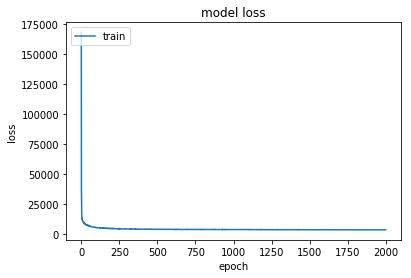

In [35]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### weather prediction

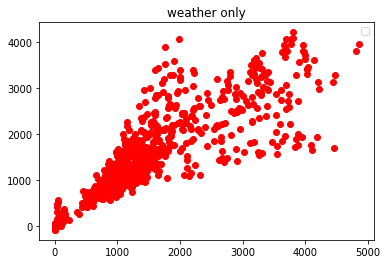

359158.78205554537


In [36]:
y_pred_weather = model.predict(X_test_weather)

plt.scatter(y_test,y_pred_weather, color = 'red')
plt.title('weather only')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, y_pred_weather)
print mse 

### stationary prediction

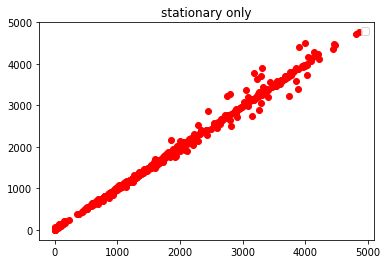

6554.763848017069


In [37]:
#y_pred_stationary = model2.predict(X_test_stationary)
y_pred_stationary = ll.predict(X_test_stationary)
plt.scatter(y_test,y_pred_stationary, color = 'red')
plt.title('stationary only')
plt.legend()
plt.show()
mse2 = mean_squared_error(y_test, y_pred_stationary)
print mse2 

In [38]:
y_test_weather = pd.DataFrame(y_pred_weather)
y_test_stationary = pd.DataFrame(y_pred_stationary)
X_pred = pd.concat([y_test_weather, y_test_stationary],axis=1)
y_pred = classifier.predict(X_pred)

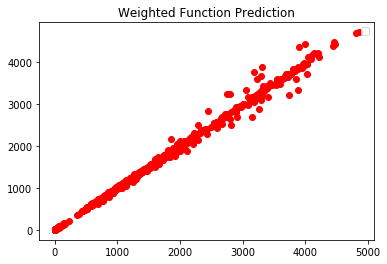

In [39]:
plt.scatter(y_test,y_pred, color = 'red')
plt.title('Weighted Function Prediction')
plt.legend()
plt.show()

In [40]:
mse3 = mean_squared_error(y_test, y_pred)
print mse3 

6536.949804768782


### plot loss history

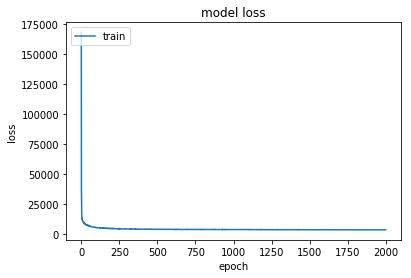

In [41]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
pred2 = ll.predict(X_test)
mse2 = mean_squared_error(y_test,pred2)
print mse2

6192.454428006219


In [ ]:
plt.scatter(y_test,pred2, color = 'red')
plt.title('Lasso prediction')
plt.legend()
plt.show()